In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC
from source.mcmc_state import State

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
start = State(start)
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(1000)

print(markov_chain.chain)

Starting Markov Chain
Printing initial state: (Omega_m: 0.30535218346748016, Omega_L: 0.49260976345346474, H0: 90.76020114810564, M: -19.355176122222783)
Chain after addition of initial state: self.chain=array([[0.30535218346748016, 0.49260976345346474, 90.76020114810564,
        -19.355176122222783]], dtype=object) type(self.chain)=<class 'numpy.ndarray'>
len(self.chain)=1 self.chain.shape=(1, 4)
[[0.30535218346748016 0.49260976345346474 90.76020114810564
  -19.355176122222783]
 [0.3274662560349242 0.32737474100305797 90.77272870859022
  -19.41235608135635]
 [0.12734343586834618 0.44739457726994053 90.59399377010587
  -19.47439207886703]
 ...
 [0.4142244167408024 0.6372266930402151 88.37435089875143
  -18.70159070562232]
 [0.22757618989442285 0.6141936970362678 88.3618530691743
  -18.94929512383913]
 [0.13505697675750733 0.8160045222264766 89.23288221720337
  -18.887261250738895]]


self <source.mcmc.MCMC object at 0x00000203762CEF70>
type self <class 'source.mcmc.MCMC'>
first ten of chain [[0.30535218346748016 0.49260976345346474 90.76020114810564
  -19.355176122222783]
 [0.3274662560349242 0.32737474100305797 90.77272870859022
  -19.41235608135635]
 [0.12734343586834618 0.44739457726994053 90.59399377010587
  -19.47439207886703]
 [0.24687093726511627 0.4633032668543786 90.96853576483967
  -19.32756946211965]
 [0.23414058542251107 0.5107383948355759 91.02967411404009
  -19.320698023748854]
 [0.4637441271628111 0.6210000334865942 91.05294477749425
  -19.309627672749826]
 [0.28726486236942206 0.49273890068388904 91.05474041505687
  -19.47045819086228]
 [0.01859226141749301 0.48356878694563304 91.15088708205047
  -19.360625561708382]
 [0.06838360647321223 0.4831618706777052 91.31512202257547
  -19.43546927583294]
 [0.07245190736303007 0.4137573847617165 91.22322563097856
  -19.407161379534514]]
first ten of chain [[0.30535218346748016 0.49260976345346474 90.76020114

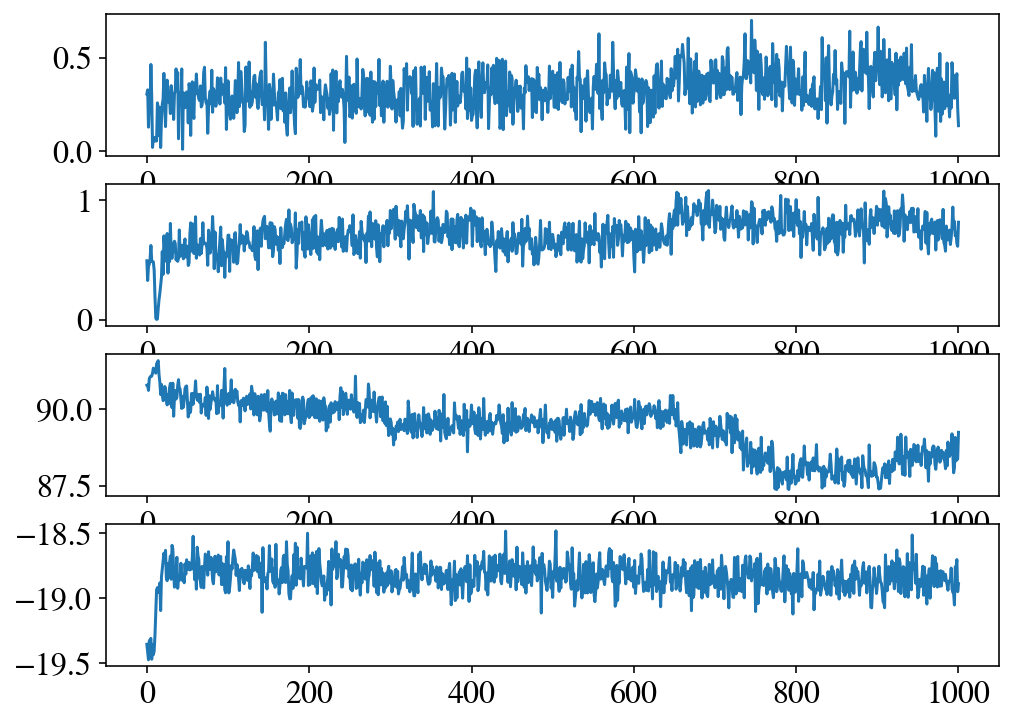

In [2]:
fig, ax = plt.subplots(4,1)

ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

In [3]:
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

AttributeError: 'float' object has no attribute 'shape'

In [ ]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

In [ ]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain2.chain[:,0])
ax[1].plot(markov_chain2.chain[:,1])
ax[2].plot(markov_chain2.chain[:,2])
ax[3].plot(markov_chain2.chain[:,3])
plt.show()

In [ ]:
plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()